## NoteBook Imports

In [358]:
from os import walk 
import sys
from os.path import join

import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from bs4 import BeautifulSoup
from wordcloud import WordCloud
from PIL import Image # PIL is short for Pillow, a package is useful for image manipulation
import numpy as np

%matplotlib inline

## Constants

In [360]:
EXAMPLE_FILE= 'SpamData/01_Processing/practice_email.txt'

SPAM_1 = 'SpamData/01_Processing/spam_assassin_corpus/spam_1'
SPAM_2 = 'SpamData/01_Processing/spam_assassin_corpus/spam_2'
EASY_NONSPAM_1 = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_1'
EASY_NONSPAM_2 = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_2'

SPAM_CAT = 1
HAM_CAT = 0

DATA_JASON_FILE ='SpamData/01_Processing/email_text_data.json'
WHALE_FILE = 'SpamData/01_Processing/wordcloud_resources/whale-icon.png'
SKULL_FILE = 'SpamData/01_Processing/wordcloud_resources/skull-icon.png'
THUMBS_UP_FILE = 'SpamData/01_Processing/wordcloud_resources/thumbs-up.png'
THUMBS_DOWN_FILE = 'SpamData/01_Processing/wordcloud_resources/thumbs-down.png'

## Reading Files

In [362]:
stream= open(EXAMPLE_FILE,encoding = 'Latin-1')
message = stream.read()
stream.close()

print(type(message))
print(message)

<class 'str'>
From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002
Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36
	for <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for
    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002
    07:35:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: fro

In [363]:
stream= open(EXAMPLE_FILE,encoding = 'Latin-1')
is_body = False
lines = []

for line in stream:
    if line == '\n':
       is_body = True
    elif is_body:
       lines.append(line)
   

stream.close()
email_body = '\n'.join(lines)
print(email_body)

Dear Mr Still

Good tidings to you and all your staff for the festive season ahead (Christmas).

Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa's Grotto" in your store.

But WAIT! You're probably thinking: "What makes him so special?"

Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.

You will note also, from the enclosed sketch, that I have radically redesigned Santa's outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.

I look forward to hearing from you.

Best wishes

Robin Cooper

[Excerpt from the book: The Timewaster Letters b

In [364]:
sys.getfilesystemencoding()

'utf-8'

# Generator Functions

In [366]:
def generate_square(N):
       for my_number in range(N):
            yield my_number**2

In [367]:
for i in generate_square(5):
    print(i, end= ' ->')

0 ->1 ->4 ->9 ->16 ->

In [368]:
def email_body_generator(path):
    for root, dirnames, filenames in walk(path):
        for file_name in filenames:
             filepath = join(root, file_name)
             stream= open(filepath,encoding = 'Latin-1')
                
             is_body = False
             lines = []
             for line in stream:
                    if line == '\n':
                        is_body = True
                    elif is_body:
                        lines.append(line)
                        
             stream.close()
             email_body = '\n'.join(lines)
             print(email_body) 

             yield file_name, email_body
    

In [369]:
def df_from_directory(path, classification):
    rows = []
    row_names = []
    for file_name, email_body in email_body_generator(path):
        rows.append({'MESSAGE':email_body,'CATEGORY': classification })
        row_names.append(file_name)
    return pd.DataFrame(rows, index= row_names)

In [370]:
spam_emails = df_from_directory(SPAM_1, SPAM_CAT)
spam_emails = pd.concat([spam_emails, df_from_directory(SPAM_2, SPAM_CAT)])
spam_emails.head()

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">

<HTML><HEAD>

<META content=3D"text/html; charset=3Dwindows-1252" http-equiv=3DContent-T=

ype>

<META content=3D"MSHTML 5.00.2314.1000" name=3DGENERATOR></HEAD>

<BODY><!-- Inserted by Calypso -->

<TABLE border=3D0 cellPadding=3D0 cellSpacing=3D2 id=3D_CalyPrintHeader_ r=

ules=3Dnone 

style=3D"COLOR: black; DISPLAY: none" width=3D"100%">

  <TBODY>

  <TR>

    <TD colSpan=3D3>

      <HR color=3Dblack noShade SIZE=3D1>

    </TD></TR></TD></TR>

  <TR>

    <TD colSpan=3D3>

      <HR color=3Dblack noShade SIZE=3D1>

    </TD></TR></TBODY></TABLE><!-- End Calypso --><!-- Inserted by Calypso=

 --><FONT 

color=3D#000000 face=3DVERDANA,ARIAL,HELVETICA size=3D-2><BR></FONT></TD><=

/TR></TABLE><!-- End Calypso --><FONT color=3D#ff0000 

face=3D"Copperplate Gothic Bold" size=3D5 PTSIZE=3D"10">

<CENTER>Save up to 70% on Life Insurance.</CENTER></FONT><FONT color=3D#ff=

0000 

face=3D"Copperplate Gothic Bold" size=3D5 PT

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



<html>

<body bgcolor=3D"#003300">

<P align=3Dcenter><FONT color=3D#ffffff size=3D5>Congratulations, 

You Won $30 Free<BR>Today At The Internet's Best &amp; Most<BR>Trusted On-=

Line 

Casino!</FONT></P>

<P align=3Dcenter><FONT color=3D#669966><FONT color=3D#ffffff size=3D4>To =

Collect Your 

$30 Cash </FONT><A 

href=3D"http://members.triposd.uk%41988289key=3D96589521041988289index=3DA=

21r7P6qW41988289.9619532@%77%77%77.%63%79%62%65%72%78%6

3%61%73%69%6e%6f.%63%6f%6d"><FONT 

size=3D4>Click Here!</FONT></A></FONT></P>

<P align=3Dcenter><A 

href=3D"http://members.triposd.uk%41988289key=3D96589521041988289index=3DA=

21r7P6qW41988289.9619532@%77%77%77.%63%79%62%65%72%78%6

3%61%73%69%6e%6f.%63%6f%6d"><IMG 

alt=3D"Click Here To Collect Your $30 Dollars Free And Start Playing!" 

src=3D"http://members.triposd.uk%81900955key=3D96589521081900955index=3DA2=

1r7P6qW81900955.79048@%77%77%77.%70%72%65%73%74%69%67%6

5%63%61%73%69%6e%6f.%63%6f%6d/%70ic/%70%72e%76ie%77%73/%62i%67/%62

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



This is a multi-part message in MIME format.

------=_NextPart_000_86B25_01C22F3F.3AF11B40

Content-Type: text/plain;

	charset="Windows-1252"

Content-Transfer-Encoding: 7bit

 You're Invited!

 Learn About Our...

    

 FREE Annuity Client Seminar System	

Call us to reserve your space today!

 800-752-0207	

This is not just another seminar system.

Ours works and it's FREE!

 A group of InsurMark's top financial planners have been dramatically

growing

 their incomes using our system. In fact, our agents earn 20 times the

national

 average! Plus, InsurMark is sharing in part or all of the seminar

expenses. If you

 are currently selling using another seminar system -stop now- and call

us!

 Our formula for success will increase your income within 60 days! 

FORMULA FOR SUCCESS

? Avg of 250 RSVP's per seminar	 ? Avg Annuity Sale = $100,000	 

? 60% Avg Buying Units = 150	 ? Avg Agent Commission @ 6% = $6,000

? 33% New Client Appointments = 50	 ? Avg Seminar Commission =

180

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



<html><head><title>Untitled Document</title><meta http-equiv="Content-Type" content="text/html; charset=iso-8859-1"></head><body bgcolor="#FFFFFF" text="#000000" background="PCPhonehome"><table width="500" border="8" cellspacing="0" cellpadding="0" align="center" bordercolor="#660000" height="400" background="http://www.pclojack.com/images/email/bglogo1.jpg"><tr>    <td valign="top">       <table width="500" border="0" cellpadding="4" align="center" bordercolor="#DDD2D2" cellspacing="0">        <tr bgcolor="#DDD2D2">           <td colspan="2"><a href="http://www.pclojack.com"><img src="http://www.pclojack.com/images/email/logo_2.gif" width="220" height="64" border="0"></a></td></tr><tr> <td colspan="2"> <div align="center"><font face="Arial, Helvetica, sans-serif" color="#FF0000" size="5"><font color="#660000" size="6" face="Verdana, Arial, Helvetica, sans-serif">Don't Be A Victim!</font></font></div></td></tr><tr align="center"><td colspan="2">             <table width="100%" border="

MESSAGE  \
00001.7848dde101aa985090474a91ec93fcf0  <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...   
00002.d94f1b97e48ed3b553b3508d116e6a09  1) Fight The Risk of Cancer!\n\nhttp://www.adc...   
00003.2ee33bc6eacdb11f38d052c44819ba6c  1) Fight The Risk of Cancer!\n\nhttp://www.adc...   
00004.eac8de8d759b7e74154f142194282724  ##############################################...   
00005.57696a39d7d84318ce497886896bf90d  I thought you might like these:\n\n1) Slim Dow...   

                                        CATEGORY  
00001.7848dde101aa985090474a91ec93fcf0         1  
00002.d94f1b97e48ed3b553b3508d116e6a09         1  
00003.2ee33bc6eacdb11f38d052c44819ba6c         1  
00004.eac8de8d759b7e74154f142194282724         1  
00005.57696a39d7d84318ce497886896bf90d         1

In [371]:
ham_emails = pd.concat([df_from_directory(EASY_NONSPAM_1, HAM_CAT), df_from_directory(EASY_NONSPAM_2, HAM_CAT)])
ham_emails.head()

    Date:        Wed, 21 Aug 2002 10:54:46 -0500

    From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>

    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>

  | I can't reproduce this error.

For me it is very repeatable... (like every time, without fail).

This is the debug log of the pick happening ...

18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury}

18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury

18:19:04 Ftoc_PickMsgs {{1 hit}}

18:19:04 Marking 1 hits

18:19:04 tkerror: syntax error in expression "int ...

Note, if I run the pick command by hand ...

delta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury

1 hit

That's where the "1 hit" comes from (obviously).  The version of nmh I'm

using is ...

delta$ pick -version

pick -- nmh-1.0.4 [compiled on fuchsia.cs.mu.OZ.AU at Sun Mar 

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [372]:
ham_emails.shape

(3901, 2)

In [373]:
data = pd.concat([spam_emails, ham_emails])
print('the shape of the entire dataframe:', data.shape)
data.head()


the shape of the entire dataframe: (5799, 2)


MESSAGE  \
00001.7848dde101aa985090474a91ec93fcf0  <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...   
00002.d94f1b97e48ed3b553b3508d116e6a09  1) Fight The Risk of Cancer!\n\nhttp://www.adc...   
00003.2ee33bc6eacdb11f38d052c44819ba6c  1) Fight The Risk of Cancer!\n\nhttp://www.adc...   
00004.eac8de8d759b7e74154f142194282724  ##############################################...   
00005.57696a39d7d84318ce497886896bf90d  I thought you might like these:\n\n1) Slim Dow...   

                                        CATEGORY  
00001.7848dde101aa985090474a91ec93fcf0         1  
00002.d94f1b97e48ed3b553b3508d116e6a09         1  
00003.2ee33bc6eacdb11f38d052c44819ba6c         1  
00004.eac8de8d759b7e74154f142194282724         1  
00005.57696a39d7d84318ce497886896bf90d         1

In [374]:
data.tail()

MESSAGE  \
01396.61983fbe6ec43f55fd44e30fce24ffa6  http://news.bbc.co.uk/1/hi/england/2515127.stm...   
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7  > >-- be careful when using this one.) Also, t...   
01398.169b51731fe569f42169ae8f948ec676  >>>>> "SM" == Skip Montanaro <skip@pobox.com> ...   
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896  So then, "Mark Hammond" <mhammond@skippinet.co...   
01400.f897f0931e461e7b2e964d28e927c35e  Hi there,\n\nNow this is probably of no use to...   

                                        CATEGORY  
01396.61983fbe6ec43f55fd44e30fce24ffa6         0  
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7         0  
01398.169b51731fe569f42169ae8f948ec676         0  
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896         0  
01400.f897f0931e461e7b2e964d28e927c35e         0

# Data Cleaning: Checking for Missing Values

In [376]:
#check if any message bodies are null
data['MESSAGE'].isnull().values.any()

False

In [377]:
#Check if there are any empty emails
(data.MESSAGE.str.len() == 0).sum()

3

In [378]:
#Check the number of null values in the dataframe
data.MESSAGE.isnull().sum()

0

### Locate Empty Emails

In [380]:
data[(data.MESSAGE.str.len() == 0)].index

Index(['cmds', 'cmds', 'cmds'], dtype='object')

In [381]:
data.index.get_loc('cmds')

array([False, False, False, ..., False, False, False])

# Remove System File Entries from the Dataframe

In [383]:
data.drop(['cmds'], inplace = True)

In [384]:
(data.MESSAGE.str.len() == 0).sum()

0

In [385]:
data.shape

(5796, 2)

# Add Document IDs to Track Emails in Dataset

In [387]:
document_ids = range(0, len(data.index))
data['DOC_ID']= document_ids
data['FILE_NAME'] = data.index
data.set_index('DOC_ID', inplace= True)
data.tail()

MESSAGE  CATEGORY  \
DOC_ID                                                                
5791    http://news.bbc.co.uk/1/hi/england/2515127.stm...         0   
5792    > >-- be careful when using this one.) Also, t...         0   
5793    >>>>> "SM" == Skip Montanaro <skip@pobox.com> ...         0   
5794    So then, "Mark Hammond" <mhammond@skippinet.co...         0   
5795    Hi there,\n\nNow this is probably of no use to...         0   

                                     FILE_NAME  
DOC_ID                                          
5791    01396.61983fbe6ec43f55fd44e30fce24ffa6  
5792    01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7  
5793    01398.169b51731fe569f42169ae8f948ec676  
5794    01399.ca6b00b7b341bbde9a9ea3dd6a7bf896  
5795    01400.f897f0931e461e7b2e964d28e927c35e

# Save to File Using Pandas

In [389]:
data.to_json(DATA_JASON_FILE)

# Number of Spam Messages Visualised (Pie Charts)

In [391]:
data.CATEGORY.value_counts()

CATEGORY
0    3900
1    1896
Name: count, dtype: int64

In [392]:
amount_of_spam = data.CATEGORY.value_counts()[1]
amount_of_ham = data.CATEGORY.value_counts()[0]

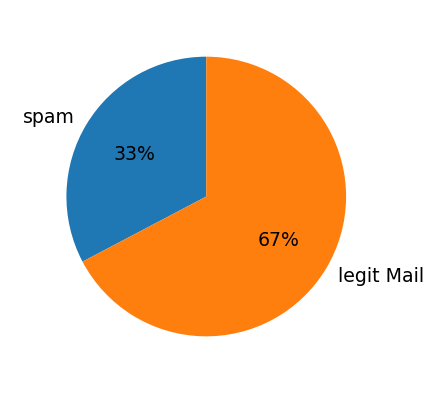

In [393]:
category_names = ['spam', 'legit Mail']
sizes = [amount_of_spam, amount_of_ham]

plt.figure(figsize = (2, 2), dpi= 227)
plt.pie(sizes, labels= category_names, textprops={'fontsize': 6}, startangle = 90,
       autopct = '%1.0f%%' )
plt.show()

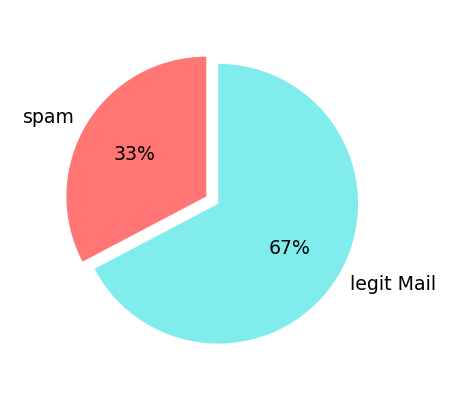

In [394]:
category_names = ['spam', 'legit Mail']
sizes = [amount_of_spam, amount_of_ham]
custom_colors = ['#ff7675', '#81ecec']

plt.figure(figsize = (2, 2), dpi= 227)
plt.pie(sizes, labels= category_names, textprops={'fontsize': 6}, startangle = 90,
       autopct = '%1.0f%%', colors = custom_colors, explode= [0, 0.1] )
plt.show()

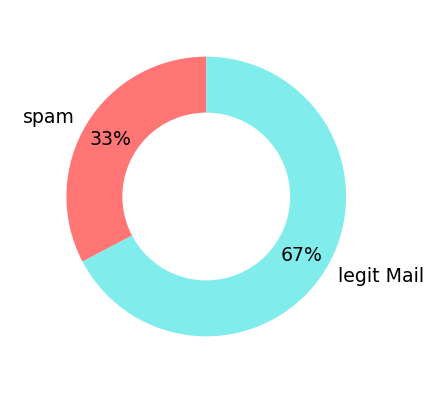

In [395]:
category_names = ['spam', 'legit Mail']
sizes = [amount_of_spam, amount_of_ham]
custom_colors = ['#ff7675', '#81ecec']

plt.figure(figsize = (2, 2), dpi= 227)
plt.pie(sizes, labels= category_names, textprops={'fontsize': 6}, startangle = 90,
       autopct = '%1.0f%%', colors = custom_colors,  pctdistance=0.8 )

#draw circle
centre_circle = plt.Circle((0,0), radius=0.6, fc='white')
plt.gca().add_artist(centre_circle) #get the current axis and add the circle

plt.show()

# Natural Language Processing

## Text Pre-Processing

In [398]:
#Convert to lower case
msg = 'All work and no play makes Hiran, me a dull person!'
msg.lower()

'all work and no play makes hiran, me a dull person!'

## Download NLTK Resources (Tekenizer and Stopwords)

In [400]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Hiran
[nltk_data]     Wieratne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [401]:
nltk.download('gutenberg')
nltk.download('shakespeare')

[nltk_data] Downloading package gutenberg to C:\Users\Hiran
[nltk_data]     Wieratne\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package shakespeare to C:\Users\Hiran
[nltk_data]     Wieratne\AppData\Roaming\nltk_data...
[nltk_data]   Package shakespeare is already up-to-date!


True

## Tekenizing

In [403]:
msg = 'All work and no play makes Hiran, me a dull person!'
word_tokenize(msg.lower())


['all',
 'work',
 'and',
 'no',
 'play',
 'makes',
 'hiran',
 ',',
 'me',
 'a',
 'dull',
 'person',
 '!']

In [404]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Hiran
[nltk_data]     Wieratne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Removing Stopword

In [406]:
stop_words = set(stopwords.words('English'))

In [407]:
if 'all' in stop_words: print('Found it!')

Found it!


In [408]:
if 'hello' not in stop_words: print('nope, not in here!')

nope, not in here!


In [409]:
msg = 'All work and no play makes Hiran, me a dull person, To not to be!'
words = word_tokenize(msg.lower())
filtered_words = []
#Append non stop words to filtered_words
for word in words:
    if word not in stop_words:
        filtered_words.append(word)

print(filtered_words)

['work', 'play', 'makes', 'hiran', ',', 'dull', 'person', ',', '!']


## Word Stems and Stemming

In [411]:
msg = 'All work and no play makes Hiran, me a dull person, To not to be!'
words = word_tokenize(msg.lower())
stemmer = PorterStemmer()
filtered_words = []
#Append non stop words to filtered_words
for word in words:
    if word not in stop_words:
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)

print(filtered_words)

['work', 'play', 'make', 'hiran', ',', 'dull', 'person', ',', '!']


## Removing Punctuation

In [413]:
'P'.isalpha()

True

In [414]:
'?'.isalpha()

False

In [415]:
msg = 'All work and no play makes Hiran, me a dull person, To not to be!????/'
words = word_tokenize(msg.lower())
stemmer = PorterStemmer()
filtered_words = []
#Append non stop words to filtered_words
for word in words:
    if word not in stop_words and word.isalpha():
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)

print(filtered_words)

['work', 'play', 'make', 'hiran', 'dull', 'person']


In [416]:
soup = BeautifulSoup(data.at[0, 'MESSAGE'], 'html.parser')
print(soup.prettify())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">
<html>
 <head>
  <meta charset="utf-8" content='3D"text/html;' http-equiv="3DContent-T=" ype=""/>
  <meta 5.00.2314.1000"="" content='3D"MSHTML' name="3DGENERATOR"/>
 </head>
 <body>
  <!-- Inserted by Calypso -->
  <table black;="" border="3D0" cellpadding="3D0" cellspacing="3D2" display:="" id="3D_CalyPrintHeader_" none"="" r="ules=3Dnone" style='3D"COLOR:' width='3D"100%"'>
   <tbody>
    <tr>
     <td colspan="3D3">
      <hr color="3Dblack" noshade="" size="3D1"/>
     </td>
    </tr>
    <tr>
     <td colspan="3D3">
      <hr color="3Dblack" noshade="" size="3D1"/>
     </td>
    </tr>
   </tbody>
  </table>
  <!-- End Calypso -->
  <!-- Inserted by Calypso=

 -->
  <font color="3D#000000" face="3DVERDANA,ARIAL,HELVETICA" size="3D-2">
   <br/>
  </font>
  &lt;=

/TR&gt;
  <!-- End Calypso -->
  <font bold"="" color="3D#ff0000" face='3D"Copperplate' gothic="" ptsize='3D"10"' size="3D5">
   <center>
    Save up to 70% o

In [417]:
soup.get_text()

"\n\n\n\n\n\n\n\n\n\n\n\n\n\n<=\n\n/TR>\nSave up to 70% on Life Insurance.\nWhy Spend More Than You Have To?\n\n\nLife Quote Savings\n\n\n\n\n\n\n\n\n\n\n\nEnsurin=\n\ng your \n\n      family's financial security is very important. Life Quote Savings ma=\n\nkes \n\n      buying life insurance simple and affordable. We Provide FREE Access =\n\nto The \n\n      Very Best Companies and The Lowest Rates.\n\n\n\n\n\nLife Quote Savings is FAST, EAS=\n\nY and \n\n            SAVES you money! Let us help you get started with the best val=\n\nues in \n\n            the country on new coverage. You can SAVE hundreds or even tho=\n\nusands \n\n            of dollars by requesting a FREE quote from Lifequote Savings. =\n\nOur \n\n            service will take you less than 5 minutes to complete. Shop an=\n\nd \n\n            compare. SAVE up to 70% on all types of Life insurance! \n\n\n\n\nClick Here For Your=\n\n \n\n            Free Quote!\n\nProtecting your family is the best investment you'll 

## Functions for Email Processing

In [419]:
def clean_message(message, stemmer=PorterStemmer(), 
                  stopwords=set(stopwords.words('english'))):

    # Converts to lowercase and splits up the words
    words = word_tokenize(message.lower())
    
    filtered_words = []

    for word in words:
        # Removes the stop words and punctuation
        if word not in stopwords and word.isalpha():
            filtered_words.append(stemmer.stem(word))
            
    return filtered_words

In [420]:
clean_message(email_body)

['dear',
 'mr',
 'still',
 'good',
 'tide',
 'staff',
 'festiv',
 'season',
 'ahead',
 'christma',
 'crux',
 'fulli',
 'qualifi',
 'santa',
 'clau',
 'wonder',
 'whether',
 'might',
 'consid',
 'run',
 'santa',
 'grotto',
 'store',
 'wait',
 'probabl',
 'think',
 'make',
 'special',
 'well',
 'first',
 'made',
 'sever',
 'chang',
 'characteris',
 'father',
 'christma',
 'rather',
 'greet',
 'children',
 'shout',
 'ho',
 'ho',
 'ho',
 'prefer',
 'whisper',
 'phrase',
 'depend',
 'unfathom',
 'cruel',
 'world',
 'live',
 'addit',
 'gift',
 'rang',
 'felt',
 'hoop',
 'holder',
 'note',
 'also',
 'enclos',
 'sketch',
 'radic',
 'redesign',
 'santa',
 'outfit',
 'renam',
 'charact',
 'lord',
 'buckl',
 'would',
 'interest',
 'employ',
 'promis',
 'never',
 'let',
 'look',
 'forward',
 'hear',
 'best',
 'wish',
 'robin',
 'cooper',
 'excerpt',
 'book',
 'timewast',
 'letter',
 'robin',
 'cooper']

In [421]:
#Modify function to remove html tag. Then test on email with DOC_ID 2.
def clean_message_no_html(message, stemmer=PorterStemmer(), 
                  stopwords=set(stopwords.words('english'))):

    soup = BeautifulSoup(message, 'html.parser')
    cleaned_message = soup.get_text()

    # Converts to lowercase and splits up the words
    words = word_tokenize(cleaned_message.lower())

    filtered_words = []

    for word in words:
        # Removes the stop words and punctuation
        if word not in stopwords and word.isalpha():
            filtered_words.append(stemmer.stem(word))
            
            
    return filtered_words

In [422]:
clean_message_no_html(data.at[0, 'MESSAGE'])

['save',
 'life',
 'insur',
 'spend',
 'life',
 'quot',
 'save',
 'g',
 'famili',
 'financi',
 'secur',
 'import',
 'life',
 'quot',
 'save',
 'ke',
 'buy',
 'life',
 'insur',
 'simpl',
 'afford',
 'provid',
 'free',
 'access',
 'best',
 'compani',
 'lowest',
 'rate',
 'life',
 'quot',
 'save',
 'fast',
 'save',
 'money',
 'let',
 'us',
 'help',
 'get',
 'start',
 'best',
 'ue',
 'countri',
 'new',
 'coverag',
 'save',
 'hundr',
 'even',
 'usand',
 'dollar',
 'request',
 'free',
 'quot',
 'lifequot',
 'save',
 'servic',
 'take',
 'less',
 'minut',
 'complet',
 'shop',
 'compar',
 'save',
 'type',
 'life',
 'insur',
 'click',
 'free',
 'quot',
 'protect',
 'famili',
 'best',
 'invest',
 'r',
 'make',
 'receipt',
 'email',
 'error',
 'wish',
 'remov',
 'list',
 'pleas',
 'click',
 'type',
 'remov',
 'resid',
 'state',
 'prohibit',
 'solicit',
 'ce',
 'pleas',
 'disregard',
 'email']

## Apply Cleaning and Tokenization to All Messages

### Slicing DataFrames and Series & Creating Subsets

In [424]:
data.iat[0,0]

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">\n\n<HTML><HEAD>\n\n<META content=3D"text/html; charset=3Dwindows-1252" http-equiv=3DContent-T=\n\nype>\n\n<META content=3D"MSHTML 5.00.2314.1000" name=3DGENERATOR></HEAD>\n\n<BODY><!-- Inserted by Calypso -->\n\n<TABLE border=3D0 cellPadding=3D0 cellSpacing=3D2 id=3D_CalyPrintHeader_ r=\n\nules=3Dnone \n\nstyle=3D"COLOR: black; DISPLAY: none" width=3D"100%">\n\n  <TBODY>\n\n  <TR>\n\n    <TD colSpan=3D3>\n\n      <HR color=3Dblack noShade SIZE=3D1>\n\n    </TD></TR></TD></TR>\n\n  <TR>\n\n    <TD colSpan=3D3>\n\n      <HR color=3Dblack noShade SIZE=3D1>\n\n    </TD></TR></TBODY></TABLE><!-- End Calypso --><!-- Inserted by Calypso=\n\n --><FONT \n\ncolor=3D#000000 face=3DVERDANA,ARIAL,HELVETICA size=3D-2><BR></FONT></TD><=\n\n/TR></TABLE><!-- End Calypso --><FONT color=3D#ff0000 \n\nface=3D"Copperplate Gothic Bold" size=3D5 PTSIZE=3D"10">\n\n<CENTER>Save up to 70% on Life Insurance.</CENTER></FONT><FONT color=3D#ff=\n\n0000

In [425]:
data.MESSAGE.iloc[5:10]

DOC_ID
5    A POWERHOUSE GIFTING PROGRAM You Don't Want To...
6    Help wanted.  We are a 14 year old fortune 500...
7    <html>\n\n<head>\n\n<title>ReliaQuote - Save U...
8    TIRED OF THE BULL OUT THERE?\n\nWant To Stop L...
9    Dear ricardo1 ,\n\n<html>\n\n<body>\n\n<center...
Name: MESSAGE, dtype: object

In [426]:
data.iloc[5:10]

MESSAGE  CATEGORY  \
DOC_ID                                                                
5       A POWERHOUSE GIFTING PROGRAM You Don't Want To...         1   
6       Help wanted.  We are a 14 year old fortune 500...         1   
7       <html>\n\n<head>\n\n<title>ReliaQuote - Save U...         1   
8       TIRED OF THE BULL OUT THERE?\n\nWant To Stop L...         1   
9       Dear ricardo1 ,\n\n<html>\n\n<body>\n\n<center...         1   

                                     FILE_NAME  
DOC_ID                                          
5       00006.5ab5620d3d7c6c0db76234556a16f6c1  
6       00007.d8521faf753ff9ee989122f6816f87d7  
7       00008.dfd941deb10f5eed78b1594b131c9266  
8       00009.027bf6e0b0c4ab34db3ce0ea4bf2edab  
9       00010.445affef4c70feec58f9198cfbc22997

In [427]:
first_emails = data.MESSAGE.iloc[0:3]

nested_list = first_emails.apply(clean_message)

In [428]:
# flat_list = []
# for sublist in nested_list:
#     for item in sublist:
#         flat_list.append(item)


# Achieving the same results usign Python list conprehension Syntax
flat_list = [item for sublist in nested_list for item in sublist]
len(flat_list)

321

In [429]:
%%time
#Use apply() on every messages on the DataFrame
nested_list = data.MESSAGE.apply(clean_message_no_html)

C:\Users\Hiran Wieratne\AppData\Local\Temp\ipykernel_15412\1772199248.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(message, 'html.parser')
C:\Users\Hiran Wieratne\AppData\Local\Temp\ipykernel_15412\1772199248.py:5: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(message, 'html.parser')


CPU times: total: 26.2 s
Wall time: 46.9 s


In [430]:
nested_list.tail()

DOC_ID
5791    [http, bizarr, collect, stuf, anim, could, fet...
5792    [care, use, one, also, realli, cute, thing, ja...
5793    [sm, skip, montanaro, write, jeremi, put, anot...
5794    [mark, hammond, like, given, zodb, sound, attr...
5795    [hi, probabl, use, whatsoev, also, problem, re...
Name: MESSAGE, dtype: object

## Using Logic to Slice a DataFrame

In [432]:
doc_ids_spam = data[data.CATEGORY == 1].index
doc_ids_ham = data[data.CATEGORY == 0].index

In [433]:
doc_ids_ham

Index([1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905,
       ...
       5786, 5787, 5788, 5789, 5790, 5791, 5792, 5793, 5794, 5795],
      dtype='int64', name='DOC_ID', length=3900)

In [434]:
nested_list_ham = nested_list.loc[doc_ids_ham]
print(nested_list_ham.shape)
nested_list_ham.tail()

(3900,)


DOC_ID
5791    [http, bizarr, collect, stuf, anim, could, fet...
5792    [care, use, one, also, realli, cute, thing, ja...
5793    [sm, skip, montanaro, write, jeremi, put, anot...
5794    [mark, hammond, like, given, zodb, sound, attr...
5795    [hi, probabl, use, whatsoev, also, problem, re...
Name: MESSAGE, dtype: object

In [435]:
nested_list_spam = nested_list.loc[doc_ids_spam]
print(nested_list_spam.shape)
nested_list_spam.tail()

(1896,)


DOC_ID
1891    [want, boss, train, home, studi, thousand, peo...
1892    [messag, mime, format, prefer, doctor, order, ...
1893    [dear, subscrib, could, show, way, get, visito...
1894    [custom, appreci, sale, express, appreci, loya...
1895    [attn, strictli, confidenti, pleas, introduc, ...
Name: MESSAGE, dtype: object

In [436]:
flat_list_ham = [item for sublist in nested_list_ham for item in sublist]
normal_words = pd.Series(flat_list_ham).value_counts()
normal_words.shape[0] #total number of uniques words in the non spam messages



20815

In [437]:
normal_words[:10] #The most commonly used words

http      7563
use       3633
list      2880
one       2373
get       2286
mail      2255
would     2003
like      1931
messag    1849
work      1800
Name: count, dtype: int64

In [438]:
flat_list_spam = [item for sublist in nested_list_spam for item in sublist]
spammy_words = pd.Series(flat_list_spam).value_counts()
spammy_words.shape[0] #total number of uniques words in the spam messages

13242

In [439]:
spammy_words[:10] #The most commonly used spammy words

http      3097
email     3090
free      2585
click     2058
receiv    1989
list      1971
get       1914
pleas     1852
busi      1792
order     1746
Name: count, dtype: int64

## Creating a Word Cloud

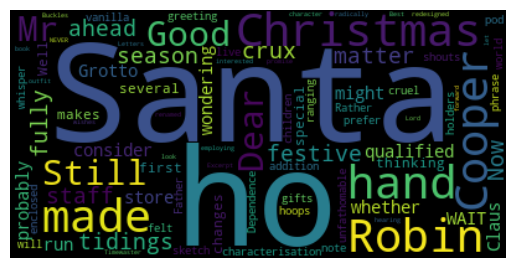

In [441]:
word_cloud = WordCloud().generate(email_body)
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [442]:
example_corpus = nltk.corpus.gutenberg.words('melville-moby_dick.txt')
len(example_corpus)

260819

In [443]:
type(example_corpus)

nltk.corpus.reader.util.StreamBackedCorpusView

In [444]:
word_list = [''.join(word) for word in example_corpus]
novel_as_string = ''.join(word_list)

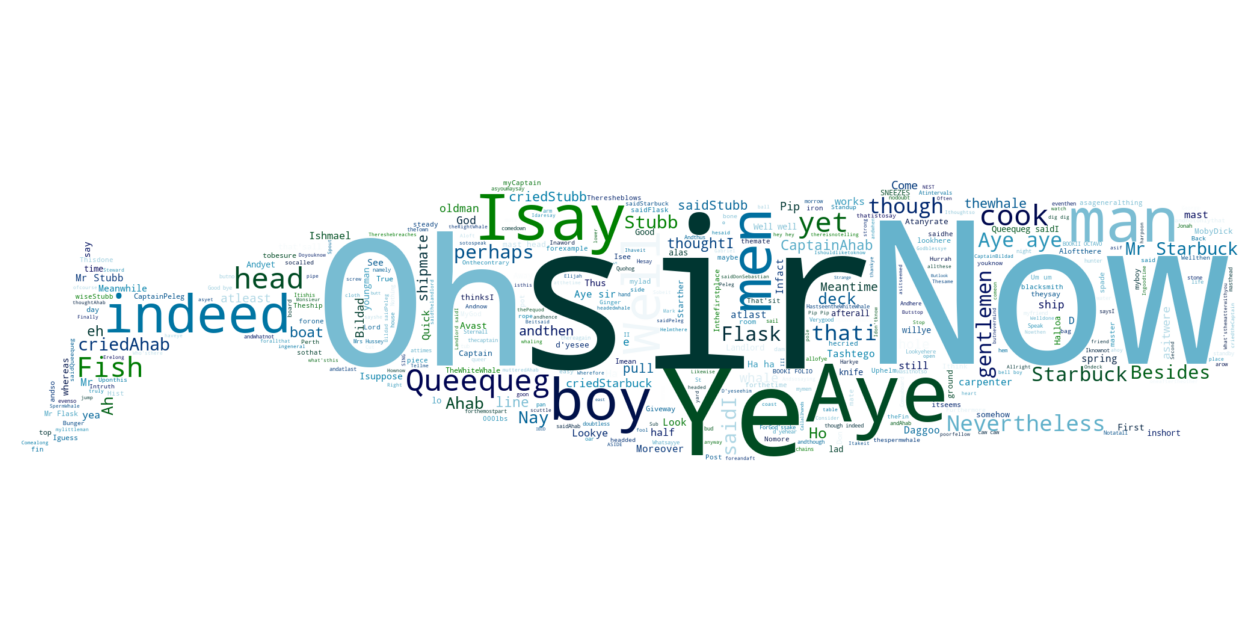

In [445]:
icon = Image.open(WHALE_FILE)
image_mask = Image.new(mode='RGB', size = icon.size, color = (255, 255, 255) )
image_mask.paste(icon, box= icon)

rgb_array = np.array(image_mask)

word_cloud = WordCloud(mask = rgb_array, background_color = 'white', 
                      max_words = 400, colormap = 'ocean' ).generate(novel_as_string)

plt.figure(figsize = [16, 8])
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

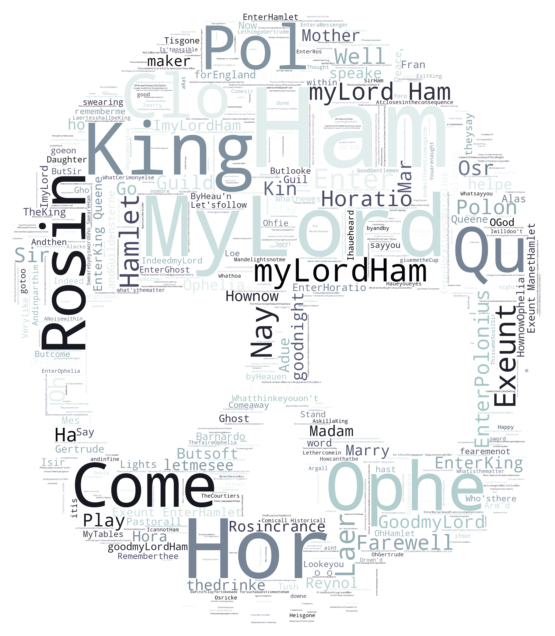

In [446]:
hamlet_corpus = nltk.corpus.gutenberg.words('shakespeare-hamlet.txt')
word_list = [''.join(word) for word in hamlet_corpus]
hamlet_as_string = ''.join(word_list)


icon = Image.open(SKULL_FILE)
image_mask = Image.new(mode='RGB', size = icon.size, color = (255, 255, 255) )
image_mask.paste(icon, box= icon)

rgb_array = np.array(image_mask)

word_cloud = WordCloud(mask = rgb_array, background_color = 'white', 
                      max_words = 600, colormap = 'bone' ).generate(hamlet_as_string)

plt.figure(figsize = [16, 8])
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

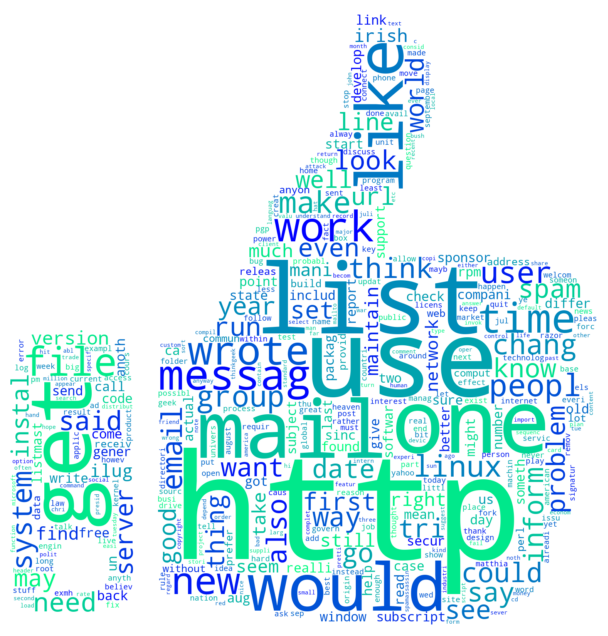

In [540]:
ham_str = ''.join(flat_list_ham)

# Open the icon file (ensure THUMBS_UP_FILE is a valid path to your image)
icon = Image.open(THUMBS_UP_FILE)

# Create an RGB image with the same size as the icon and paste the icon onto it
image_mask = Image.new(mode='RGB', size=icon.size, color=(255, 255, 255))
image_mask.paste(icon, box=(icon))

# Convert the image mask to a numpy array for word cloud
rgb_array = np.array(image_mask)
word_freq = Counter(flat_list_ham)

# Generate the word cloud from word frequencies
word_cloud = WordCloud(mask=rgb_array, background_color='white',
                       max_words=400, colormap='winter')

word_cloud.generate_from_frequencies(word_freq)
#word_cloud.generate(ham_str)

# Display the word cloud
plt.figure(figsize=[16, 8])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()


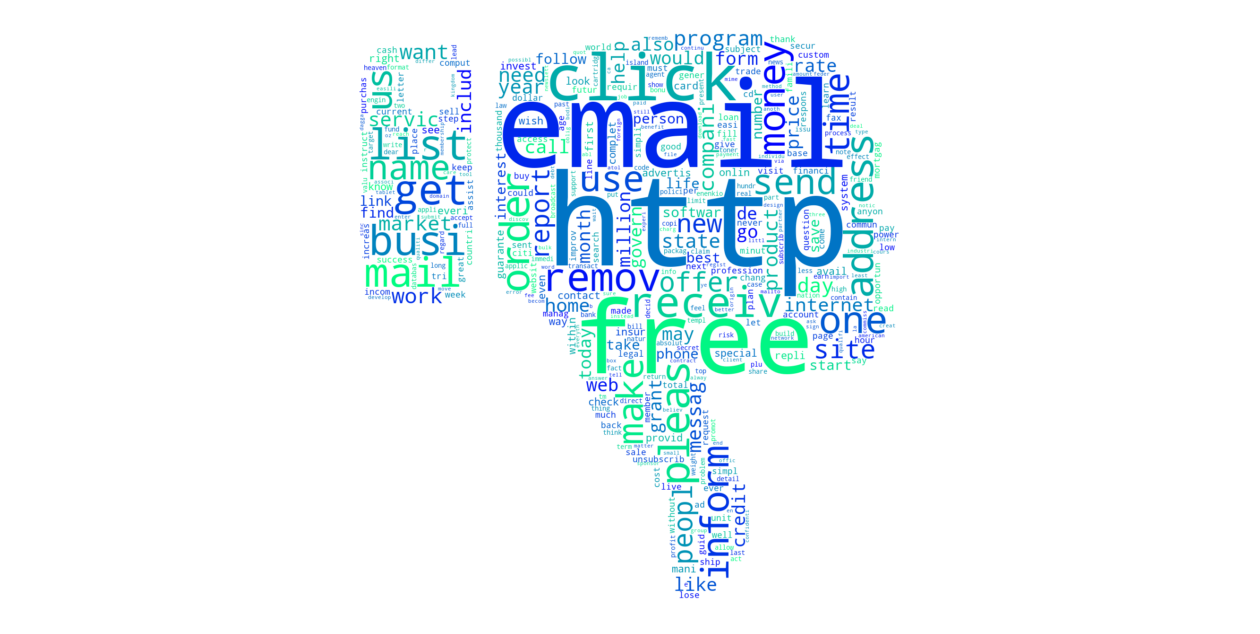

In [542]:
ham_str = ''.join(flat_list_ham)

# Open the icon file (ensure THUMBS_UP_FILE is a valid path to your image)
icon = Image.open(THUMBS_DOWN_FILE)

# Create an RGB image with the same size as the icon and paste the icon onto it
image_mask = Image.new(mode='RGB', size=icon.size, color=(255, 255, 255))
image_mask.paste(icon, box=(icon))

# Convert the image mask to a numpy array for word cloud
rgb_array = np.array(image_mask)
word_freq = Counter(flat_list_spam)

# Generate the word cloud from word frequencies
word_cloud = WordCloud(mask=rgb_array, background_color='white',
                       max_words=400, colormap='winter')

word_cloud.generate_from_frequencies(word_freq)
#word_cloud.generate(ham_str)

# Display the word cloud
plt.figure(figsize=[16, 8])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()